# Simulation Bimulation

In [64]:
import matplotlib.pyplot as plt
import numpy as np

In [112]:
def calculate_monthly_income(months, monthly_salary, investment_return_rate, monthly_investment):
    monthly_incomes = []
    total_investments = 0
    for month in range(months):
        investment_return_rate = np.random.normal(investment_return_rate / 12, 0.01)
        fluctuation = 1 + random.uniform(-0.05, 0.05)  # Random fluctuation between -5% and +5%
        current_salary = monthly_salary * fluctuation
        monthly_investment_return = total_investments * (investment_return_rate / 12)
        total_income = current_salary + monthly_investment_return
        total_investments += monthly_investment
        monthly_incomes.append(total_income)
    return monthly_incomes

In [113]:
def calculate_monthly_expenses(months, monthly_tax, monthly_rent, monthly_mortgage, monthly_other_expenses):
    monthly_expenses_list = []
    for month in range(months):
        fluctuation = 1 + random.uniform(-0.03, 0.03)  # Random fluctuation between -3% and +3%
        monthly_other_expenses = np.random.normal(monthly_other_expenses, 200)
        monthly_expenses = (monthly_tax + monthly_rent + monthly_mortgage + monthly_other_expenses) * fluctuation
        monthly_expenses_list.append(monthly_expenses)
    return monthly_expenses_list

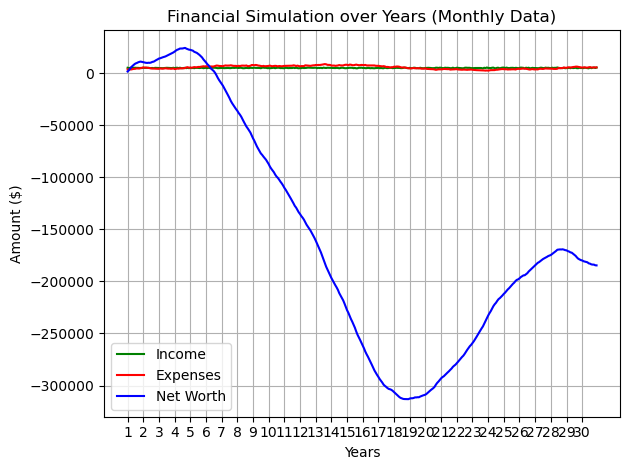

In [118]:
def main():
    years = 30
    months = years * 12
    monthly_salary = 5000
    investment_return_rate = 0.07223
    monthly_investment = 500

    monthly_tax = 0.3 * monthly_salary  # Assuming 30% tax rate
    monthly_rent = 800
    monthly_mortgage = 500
    monthly_other_expenses = 1000  # Groceries, utilities, entertainment, etc.

    incomes = calculate_monthly_income(months, monthly_salary, investment_return_rate, monthly_investment)
    expenses = calculate_monthly_expenses(months, monthly_tax, monthly_rent, monthly_mortgage, monthly_other_expenses)

    # Calculate net worth
    net_worths = [0] * months
    for month in range(months):
        if month == 0:
            net_worths[month] = incomes[month] - expenses[month]
        else:
            net_worths[month] = net_worths[month - 1] + (incomes[month] - expenses[month])

    # Plotting
    plt.plot(range(months), incomes, label='Income', color='green')
    plt.plot(range(months), expenses, label='Expenses', color='red')
    plt.plot(range(months), net_worths, label='Net Worth', color='blue')

    # X axis ticks to represent years
    plt.xticks([i*12 for i in range(years)], [str(i+1) for i in range(years)])

    plt.xlabel('Years')
    plt.ylabel('Amount ($)')
    plt.title('Financial Simulation over Years (Monthly Data)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

if __name__ == '__main__':
    main()